## Assignment 1  
#### -- Pattern Recognition
#### -- João Pedro Moreto Lourenção

### 1. Loading data from Wine dataset

In [1]:
# importing packages
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

UsageError: Line magic function `%from` not found.


In [ ]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
df_wine = pd.DataFrame(X, columns=wine.feature_names)
df_wine['target'] = y

df_wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)

            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### 2. Selecting 2 features

In [ ]:
y = df_wine.iloc[0:177, 13].values
y = np.where(y == 1, 0, 1) #Considering only the wines with target = 1
class_1 = 3
class_2 = 5
X = df_wine.iloc[0:177, [class_1, class_2]].values

### 3. Training the ADALINE model

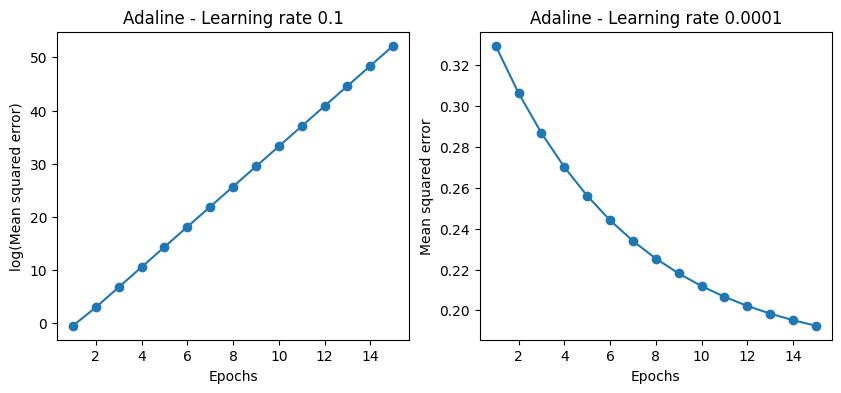

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [ ]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

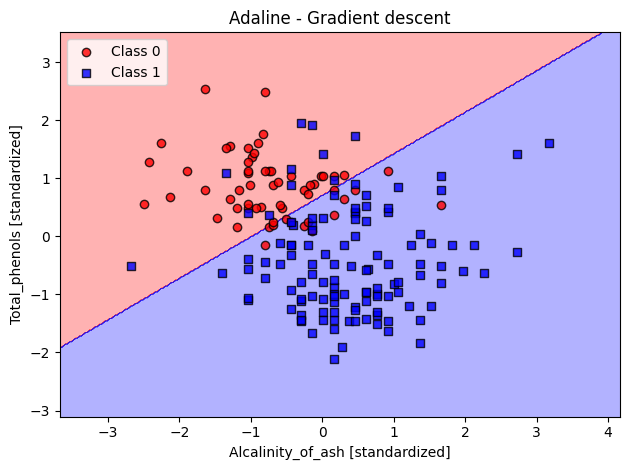

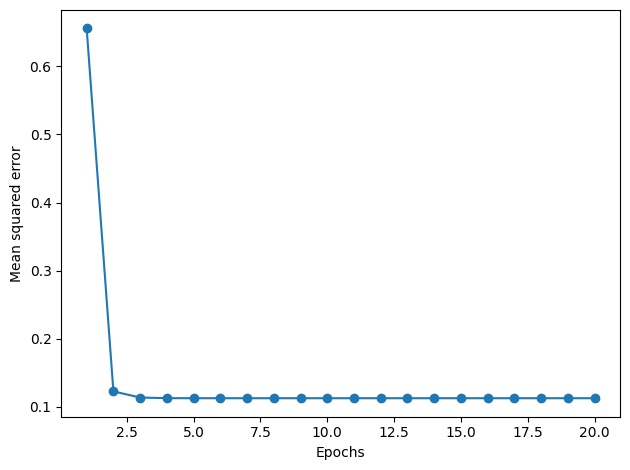

In [ ]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

feature_names = df_wine.columns[:-1]
xlabel = feature_names[class_1]
ylabel = feature_names[class_2]

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel(f'{xlabel} [standardized]')
plt.ylabel(f'{ylabel} [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
plt.show()

### 4. Analyzing other features


As shown in the table below, the best characteristics of the pair are Magnesium and Proline (~97%). But Alcohol and Proline (95%), Flavonoids and Proline (95%) and, 0D280_0D315_of_diluted_wines and Proline (95%) are also good, a little worse than Magnesium and Proline.


#### Visual Comparison Table 
| Class 1  | Class 2 | Visual Result (%) |
| ------------- | ------------- | ------------- |
| Alcohol  | Malicacid  |     70%        |
| Alcohol  | Ash  |     75%        |
| Alcohol  | Alcalinity_of_ash | 70% |
| Alcohol  | Magnesium | 65% |
| Alcohol  | Total_phenols | 85% |
| Alcohol  | Flavonoids  | 90% |
| Alcohol  | Nonflavanoid_phenols | 75% |
| Alcohol  | Proanthocyanins  | 70% |
| Alcohol  | Color_intensity  | 65% |
| Alcohol  | Hue  | 80% |
| Alcohol  | 0D280_0D315_of_diluted_wines  | 90% |
| Alcohol  | Proline  | 95% |
| Malicacid  | Ash  |     65%        |
| Malicacid  | Alcalinity_of_ash | 65% |
| Malicacid  | Magnesium | 60% |
| Malicacid  | Total_phenols | 55% |
| Malicacid  | Flavonoids  | 70% |
| Malicacid  | Nonflavanoid_phenols | 30% |
| Malicacid  | Proanthocyanins  | 50% |
| Malicacid  | Color_intensity  | 90% |
| Malicacid  | Hue  | 60% |
| Malicacid  | 0D280_0D315_of_diluted_wines  | 60% |
| Malicacid  | Proline  | 85% |
| Ash  | Alcalinity_of_ash | 75% |
| Ash  | Magnesium | 65% |
| Ash  | Total_phenols | 70% |
| Ash  | Flavonoids  | 75% |
| Ash  | Nonflavanoid_phenols | 60% |
| Ash  | Proanthocyanins  | 60% |
| Ash  | Color_intensity  | 5% |
| Ash  | Hue  | 65% |
| Ash  | 0D280_0D315_of_diluted_wines  | 60% |
| Ash  | Proline  | 85% |
| Alcalinity_of_ash  | Magnesium | 70% |
| Alcalinity_of_ash  | Total_phenols | 75% |
| Alcalinity_of_ash  | Flavonoids  | 75% |
| Alcalinity_of_ash  | Nonflavanoid_phenols | 65% |
| Alcalinity_of_ash  | Proanthocyanins  | 65% |
| Alcalinity_of_ash  | Color_intensity  | 55% |
| Alcalinity_of_ash  | Hue  | 65% |
| Alcalinity_of_ash  | 0D280_0D315_of_diluted_wines  | 75% |
| Alcalinity_of_ash  | Proline  | 90% |
| Magnesium  | Total_phenols | 65% |
| Magnesium  | Flavonoids  | 75% |
| Magnesium  | Nonflavanoid_phenols | 60% |
| Magnesium  | Proanthocyanins  | 65% |
| Magnesium  | Color_intensity  | 40% |
| Magnesium  | Hue  | 45% |
| Magnesium  | 0D280_0D315_of_diluted_wines  | 50% |
| Magnesium  | Proline  | 97% |
| Total_phenols  | Flavonoids  | 80% |
| Total_phenols  | Nonflavanoid_phenols | 75% |
| Total_phenols  | Proanthocyanins  | 65% |
| Total_phenols  | Color_intensity  | 65% |
| Total_phenols  | Hue  | 65% |
| Total_phenols  | 0D280_0D315_of_diluted_wines  | 60% |
| Total_phenols  | Proline  | 90% |
| Flavonoids  | Nonflavanoid_phenols | 70% |
| Flavonoids  | Proanthocyanins  | 80% |
| Flavonoids  | Color_intensity  | 80% |
| Flavonoids  | Hue  | 75% |
| Flavonoids  | 0D280_0D315_of_diluted_wines  | 75% |
| Flavonoids  | Proline  | 95% |
| Nonflavanoid_phenols  | Proanthocyanins  | 55% |
| Nonflavanoid_phenols  | Color_intensity  | 65% |
| Nonflavanoid_phenols  | Hue  | 60% |
| Nonflavanoid_phenols  | 0D280_0D315_of_diluted_wines  | 70% |
| Nonflavanoid_phenols  | Proline  | 90% |
| Proanthocyanins  | Color_intensity  | 50% |
| Proanthocyanins  | Hue  | 40% |
| Proanthocyanins  | 0D280_0D315_of_diluted_wines  | 60% |
| Proanthocyanins  | Proline  | 90% |
| Color_intensity  | Hue  | 55% |
| Color_intensity  | 0D280_0D315_of_diluted_wines  | 75% |
| Color_intensity  | Proline  | 85% |
| Hue  | 0D280_0D315_of_diluted_wines  | 65% |
| Hue  | Proline  | 90% |
| 0D280_0D315_of_diluted_wines | Proline  | 95% |